
ID:A-1809
<br>
Date of Submission : 30-02-19

# House Price Assignment 

<h2>Summary</h2>
<br>
The objective of this assignment is predicting the Sales Price for each house based on the given data comprising of 81 explanatory variables describing (almost)every aspect of residential homes. This problem focuses on the Machine Learning Approach to the prediction, Missing data handling, Data Preprocessing, Data Cleansing, Outliers Detection and Dropping, Hyper Parameter Tuning and so on.

## Approaches included but not limited to -

Loading Data and Packages, Data visualization , Finding missing data, Normalization ,Model and predictions  and more.

##  Loading Data and Packages

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')


# Data Import

In [3]:
data_train = pd.read_csv('Data/train (7).csv')
data_test = pd.read_csv('Data/test (7).csv')

Now lets have a look at the dataframe -

## Analyzing the DataFrame 

In [4]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From the "Count" row, we can see there are a lot of missing values in this dataset. Point to be noted, they are by no means from a similar data distribution i.e normalization might be necessary. 

Furthermore, all of the given data might not be necessary to predict the target field "SalePrice". All of these will be handled further as we go on.


Having a look into actual data - 

In [5]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h5>**Here all the data are either in categorical or in numeric value. For such, we might need to convert them into numeric data</h5>

# Data Cleaning 

In [6]:
train_data=data_train.copy()
test_data =data_test.copy()
#check the numbers of samples and features
print("The train data size before dropping Id feature is :", data_train.shape)
print("The test data size before dropping Id feature is :", data_test.shape)

#Save the 'Id' column
train_ID = data_train['Id']
test_ID = data_test['Id']

#Now drop the 'Id' colum since it's unnecessary for  the prediction process.
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is :", data_train.shape) 
print("The test data size after dropping Id feature is :", data_test.shape)


The train data size before dropping Id feature is : (1460, 81)
The test data size before dropping Id feature is : (1459, 80)

The train data size after dropping Id feature is : (1460, 80)
The test data size after dropping Id feature is : (1459, 79)


## Multivariable Analysis

<h6>Checking categorical data</h6>

In [7]:
# Checking Categorical Data
data_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<h6>Checking numerical data</h6>

In [8]:
# Checking Numerical Data
data_train.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<h2>Total Features</h2>

In [9]:
cat = len(data_train.select_dtypes(include=['object']).columns)
num = len(data_train.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+', num, 'numerical', '=', cat+num, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


## Correlation Matrix

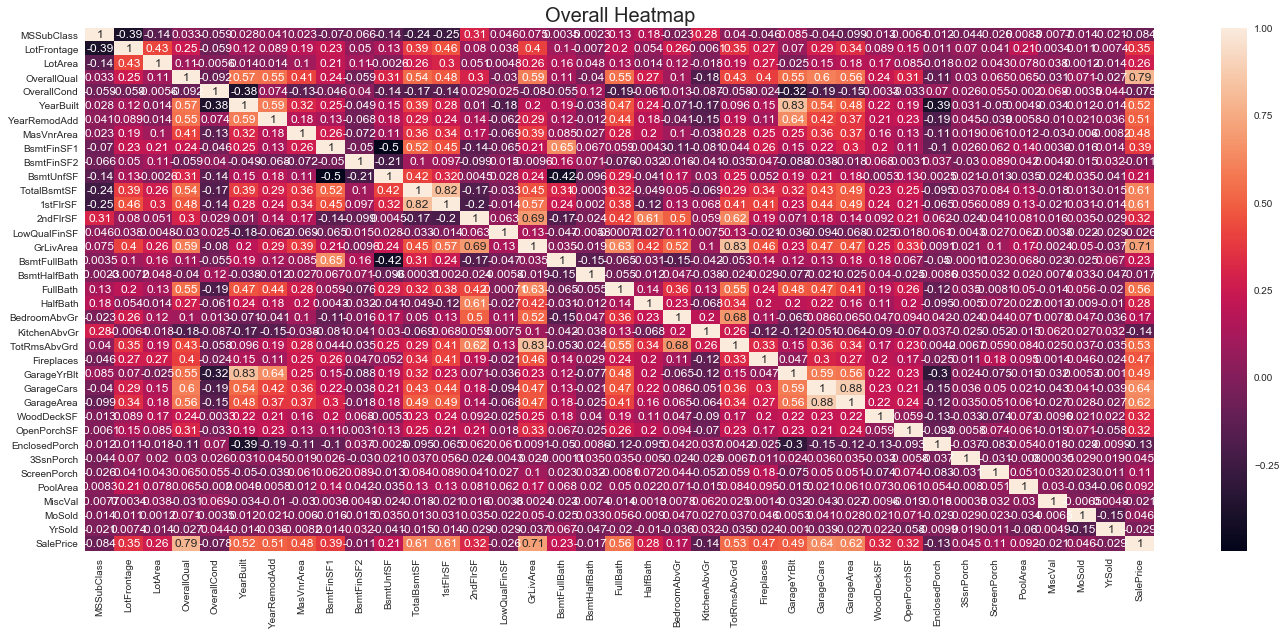

In [10]:
# Correlation Matrix
cm = data_train.corr()
plt.figure(5, figsize=(20, 9))
sns.heatmap(cm, annot=True)
plt.title('Overall Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

<h6>**Generally there are many data with a large range of values and proportions. So To edge up the process Lets take Yop 10 heatMap into account  </h6>

Generating Top 10 Features which are most relavent to SalesPrice

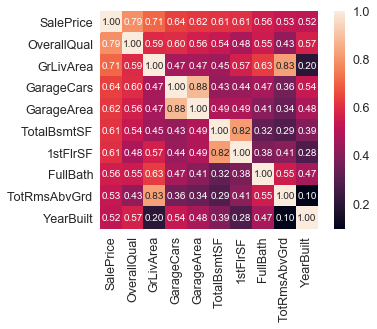

In [11]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = cm.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


<h5>For obvious reasons, most correlated feature to SalePrice will be SalePrice. With the short description to other 9 , they are described below </h5>
1. OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
2. GrLivArea: Above grade (ground) living area square feet
3. GarageCars: Size of garage in car capacity
4. GarageArea: Size of garage in square feet
5. TotalBsmtSF: Total square feet of basement area
6. 1stFlrSF: First Floor square feet
7. FullBath: Full bathrooms above grade
8. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
9. YearBuilt: Original construction date

## Manual Outliner Detection 

To make the "correlated features" easy to understand, let's figure out how each can relate to SalePrice 

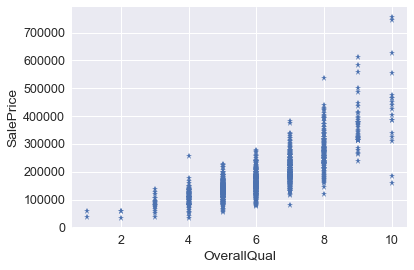

In [13]:
# Overall Quality vs Sale Price
plt.plot(data_train["OverallQual"],data_train["SalePrice"],"*")
plt.ylabel("SalePrice")
plt.xlabel("OverallQual")
plt.tight_layout()

plt.show()

##### **Here People are paying more for better quality 

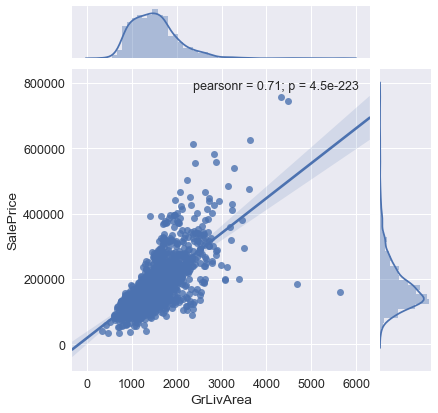

In [14]:
# Living Area vs Sale Price
sns.jointplot(x=data_train['GrLivArea'], y=data_train['SalePrice'], kind='reg')

###### **People tend to pay more for more living area but the two datapoints at the bottom-right doesnot cut the hypothesis.

considering those as outliners, these are to be removed manually

In [15]:
# Removing outliers manually (Two points in the bottom right)
data_train = data_train.drop(data_train[(data_train['GrLivArea']>4000) 
                         & (data_train['SalePrice']<300000)].index).reset_index(drop=True)

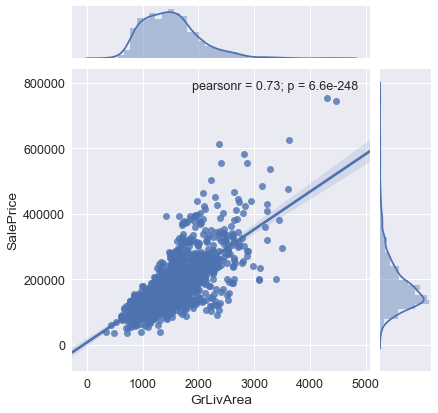

In [16]:
# Living Area vs Sale Price
sns.jointplot(x=data_train['GrLivArea'], y=data_train['SalePrice'], kind='reg')

Without the "Outliners" The Pearson-R Score improved by .02 

###### **Pearson's r can range from -1 to 1. An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables.

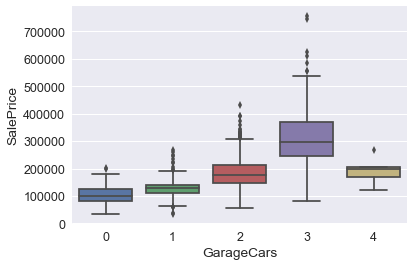

In [17]:
# GarageCars vs Sale Price
sns.boxplot(x=data_train['GarageCars'], y=data_train['SalePrice'])

The number of Garages is also a good factor for rising the SalePrice. However, 4-car garages reseults with less price makes no sense. So, considering them as outliners, remove those from dataFrame

In [18]:
# Removing outliers manually (More than 4-cars, less than $300k)
data_train = data_train.drop(data_train[(data_train['GarageCars']>3) & 
                                        (data_train['SalePrice']<300000)].index).reset_index(drop=True)

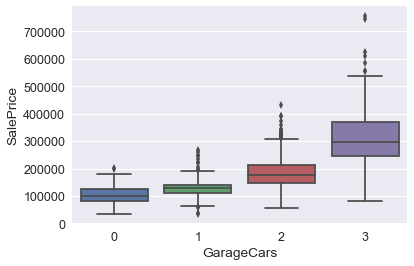

In [19]:
# GarageCars vs Sale Price
sns.boxplot(x=data_train['GarageCars'], y=data_train['SalePrice'])

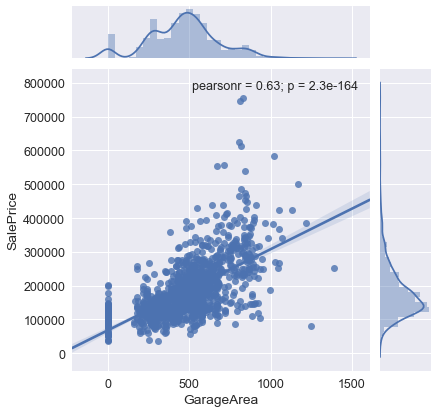

In [20]:
# Garage Area vs Sale Price
sns.jointplot(x=data_train['GarageArea'], y=data_train['SalePrice'], kind='reg')

In [21]:
# Removing outliers manually (More than 1000 sqft, less than $300k)
data_train = data_train.drop(data_train[(data_train['GarageArea']>1000) 
                         & (data_train['SalePrice']<300000)].index).reset_index(drop=True)

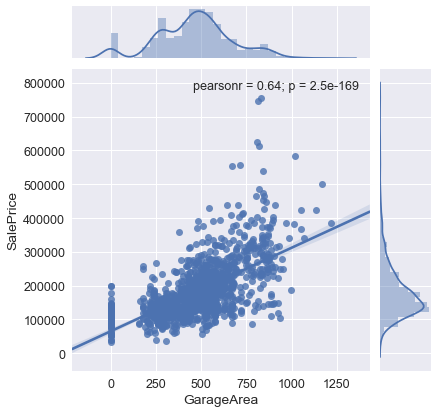

In [22]:
# Garage Area vs Sale Price
sns.jointplot(x=data_train['GarageArea'], y=data_train['SalePrice'], kind='reg')

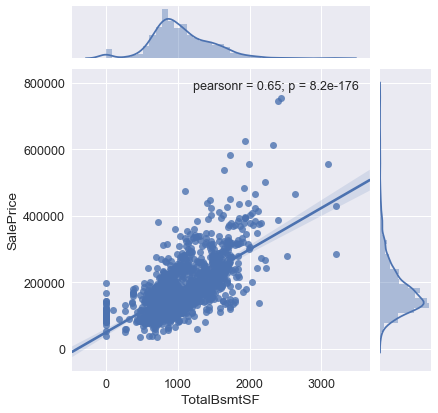

In [23]:
# Basement Area vs Sale Price
sns.jointplot(x=data_train['TotalBsmtSF'], y=data_train['SalePrice'], kind='reg')

###### **Looks fine

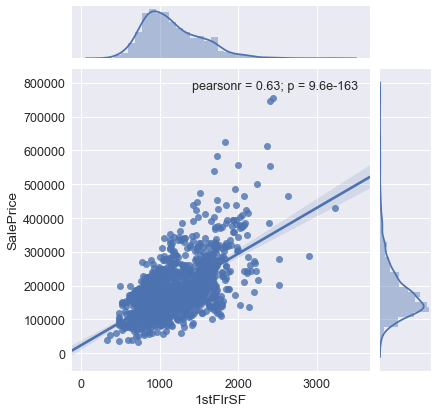

In [24]:
# First Floor Area vs Sale Price
sns.jointplot(x=data_train['1stFlrSF'], y=data_train['SalePrice'], kind='reg')

###### **Looks fine

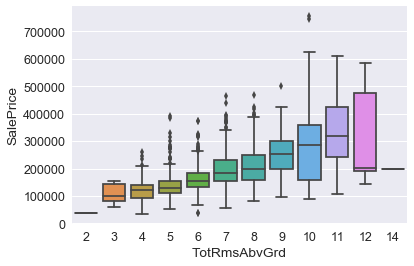

In [25]:
# Total Rooms vs Sale Price
sns.boxplot(x=data_train['TotRmsAbvGrd'], y=data_train['SalePrice'])

## Missing Data and Clean Data

Missing data can imply a reduction in sample size. To ensure missing data handling is not biased and the process is thoeratically corrrect , Let's look at the missing data fields that are in our datasets and combine the trainign and test dataset for further work-

LotFrontage : 258
Alley : 1358
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 686
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1442
Fence : 1168
MiscFeature : 1395


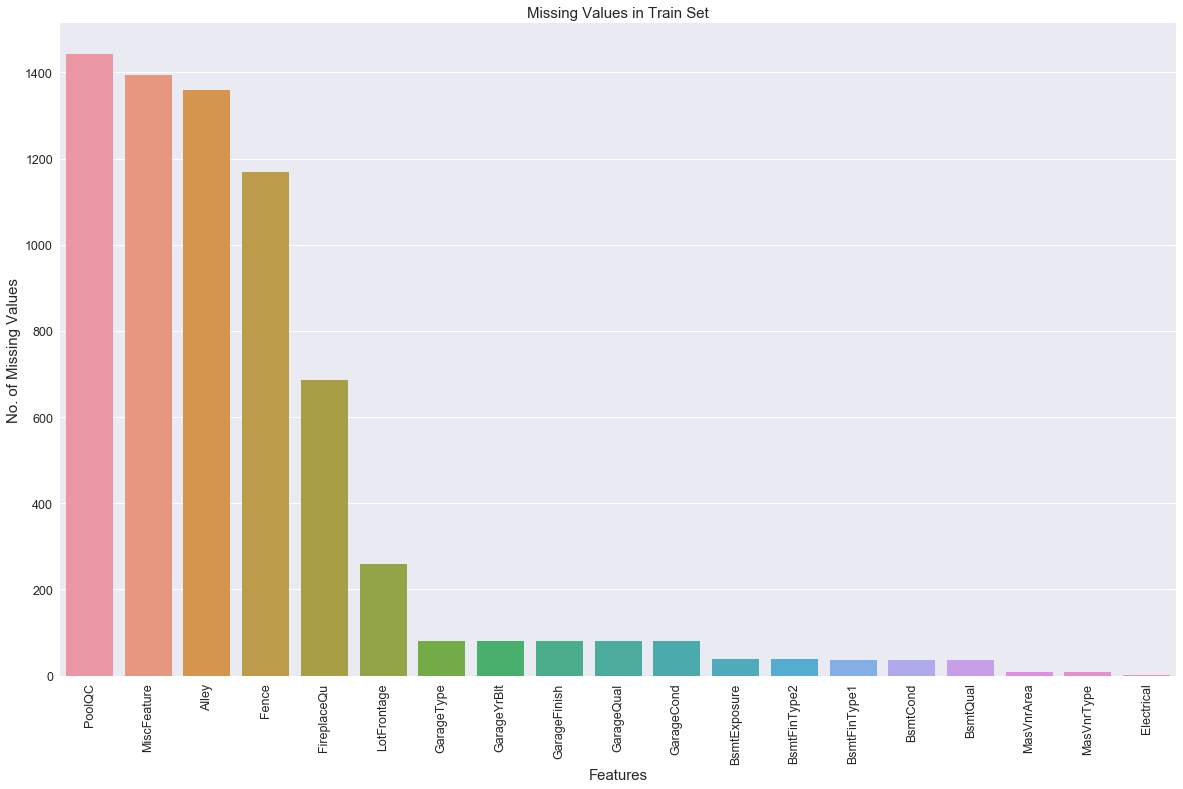

In [26]:
#check for columns with null values and the number of null values in each of them for train set
cols=data_train.columns.values.tolist()
mvx=[]
mvy=[]
cols.remove("SalePrice")
for col in cols:
    if pd.isnull(data_train[col]).sum()>0:
        mvx = mvx + [col]
        mvy = mvy + [data_train[col].isnull().sum()]
        print(col,end=" : ")
        print(pd.isnull(data_train[col]).sum())
        
temp_df = pd.DataFrame(data={'mvx':mvx, 'mvy':mvy})
temp_df = temp_df.sort_values(by=['mvy'], ascending=False)
plt.figure(1, figsize=(20,12))
sns.barplot(x=temp_df.mvx, y=temp_df.mvy)
plt.xticks(rotation='90')
plt.title('Missing Values in Train Set', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('No. of Missing Values', fontsize=15)
plt.show()

MSZoning : 4
LotFrontage : 227
Alley : 1352
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 16
MasVnrArea : 15
BsmtQual : 44
BsmtCond : 45
BsmtExposure : 44
BsmtFinType1 : 42
BsmtFinSF1 : 1
BsmtFinType2 : 42
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
BsmtFullBath : 2
BsmtHalfBath : 2
KitchenQual : 1
Functional : 2
FireplaceQu : 730
GarageType : 76
GarageYrBlt : 78
GarageFinish : 78
GarageCars : 1
GarageArea : 1
GarageQual : 78
GarageCond : 78
PoolQC : 1456
Fence : 1169
MiscFeature : 1408
SaleType : 1


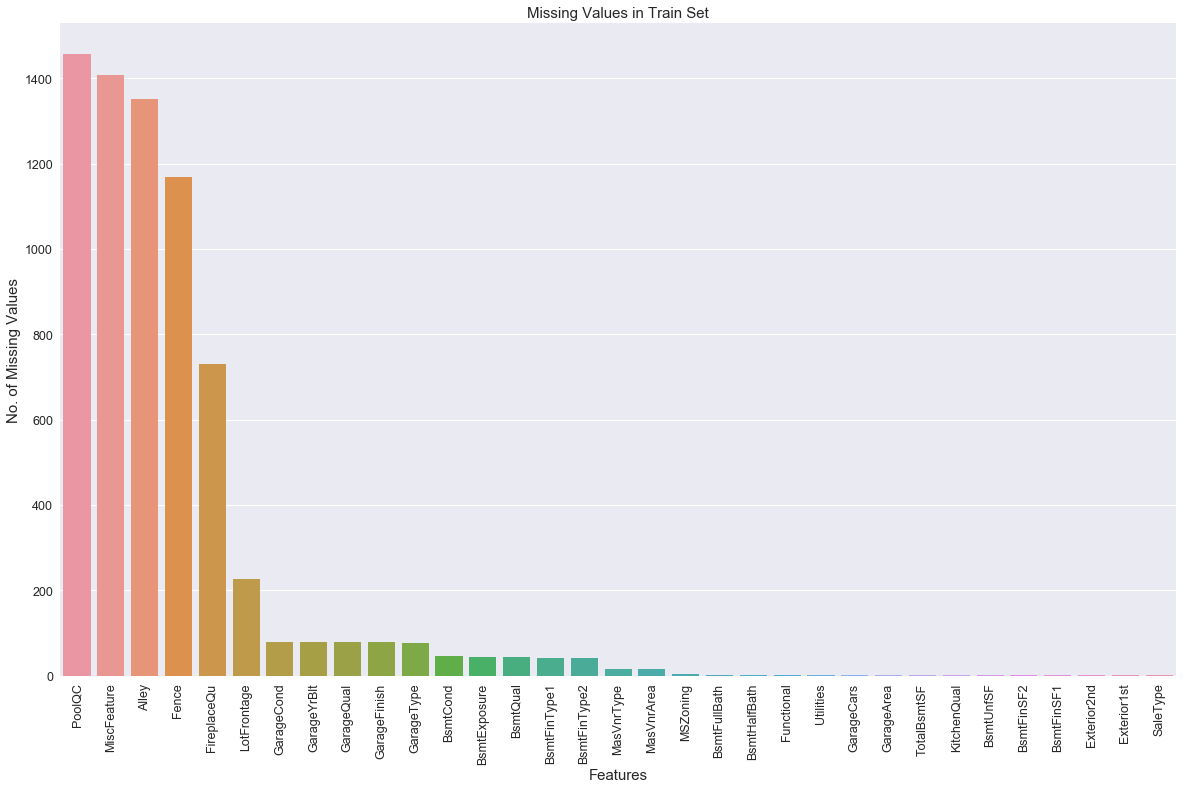

In [40]:
#check for columns with null values and the number of null values in each of them for test set
mvx=[]
mvy=[]
for col in cols:
    if pd.isnull(data_test[col]).sum()>0:
        mvx = mvx + [col]
        mvy = mvy + [data_test[col].isnull().sum()]
        print(col,end=" : ")
        print(pd.isnull(data_test[col]).sum())
temp_df = pd.DataFrame(data={'mvx':mvx, 'mvy':mvy})
temp_df = temp_df.sort_values(by=['mvy'], ascending=False)
plt.figure(1, figsize=(20,12))
sns.barplot(x=temp_df.mvx, y=temp_df.mvy)
plt.xticks(rotation='90')
plt.title('Missing Values in Train Set', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.ylabel('No. of Missing Values', fontsize=15)
plt.show()

-------------------------------------------
<h3>Analysis</h3>
As we can see there are a high number of missing values in the features titled PoolQC, MiscFeature, Alley and Fence. While apparently it may appear as if dropping these features would be a good idea, however, when I did drop them and tested it out without them, the results appear to worsen rather than improve. Therefore we will be keeping these features and assign a categorical value to their non-availability as well.  

<h4>Garage discrepancies</h4>
There appears to be some discrepancies between the garage informations provided in the test set, namely -

1. GarageType : 76
2. GarageYrBlt : 78
3. GarageFinish : 78
4. GarageQual : 78
5. GarageCond : 78

These need some data handling. Let's see where these discrepencies are appearing at - 

In [27]:
temp_df = pd.DataFrame(columns=["Index","GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","GarageCars","GarageArea "])


new_rows = []
for index, row in data_test.iterrows():
    if pd.notnull(row["GarageType"]) and pd.isnull(row["GarageYrBlt"]):
        new_rows.append([index,row["GarageType"],row["GarageYrBlt"],row["GarageFinish"],row["GarageQual"],row["GarageCond"],row["GarageCars"],row["GarageArea"]])

    
temp_df = temp_df.append(pd.DataFrame(new_rows, columns=temp_df.columns))
print(temp_df)

  Index GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond  \
0   666     Detchd          NaN           NaN         NaN         NaN   
1  1116     Detchd          NaN           NaN         NaN         NaN   

   GarageCars  GarageArea   
0         1.0        360.0  
1         NaN          NaN  


--------------------------
As we can see, for 666th index we have no values for GarageYrBlt,GarageFinish,GarageQual,GarageCond. On the other hand for 1116th, we have no values given at all save for GarageType. Thus we shall fill up the former with max and median values while assume the latter has no garage

-----------------

In [42]:
print("GarageYrBlt  : ")
print(data_test["GarageYrBlt"].median())
print("GarageFinish : ")
print(data_test["GarageFinish"].mode())
print("GarageQual : ")
print(data_test["GarageQual"].mode())
print("GarageCond : ")
print(data_test["GarageCond"].mode())


GarageYrBlt  : 
1979.0
GarageFinish : 
0    Unf
dtype: object
GarageQual : 
0    TA
dtype: object
GarageCond : 
0    TA
dtype: object


In [43]:
data_test.loc[666,"GarageQual"] = "TA"
data_test.loc[666, "GarageCond"] = "TA"
data_test.loc[666, "GarageFinish"] = "Unf"
data_test.loc[666, "GarageYrBlt"] = "1979"
data_test.loc[1116, "GarageType"] = np.nan

---------------------------------
<h2>Data Preprocessing/ Feature Engineering<h2>

In [44]:
# For imputing missing values: fill in missing LotFrontage values by the median LotFrontage of the neighborhood.
lot_frontage_by_neighborhood = data_train["LotFrontage"].groupby(data_train["Neighborhood"])

print(lot_frontage_by_neighborhood.describe()) 

              count       mean        std   min    25%   50%     75%    max
Neighborhood                                                               
Blmngtn        14.0  47.142857   4.990100  43.0  43.00  43.0   53.00   53.0
Blueste         2.0  24.000000   0.000000  24.0  24.00  24.0   24.00   24.0
BrDale         16.0  21.562500   1.209339  21.0  21.00  21.0   21.00   24.0
BrkSide        51.0  57.509804  15.528519  50.0  50.00  52.0   60.00  144.0
ClearCr        13.0  83.461538  18.875096  62.0  75.00  80.0   83.00  138.0
CollgCr       126.0  71.682540  16.359291  36.0  64.00  70.0   78.00  122.0
Crawfor        41.0  71.804878  19.436074  40.0  55.00  74.0   82.00  130.0
Edwards        90.0  64.811111  18.643850  24.0  58.25  64.5   73.75  134.0
Gilbert        49.0  79.877551  32.748176  42.0  60.00  65.0   93.00  182.0
IDOTRR         33.0  60.757576  15.435410  40.0  50.00  60.0   60.00  110.0
MeadowV        15.0  27.800000  10.107988  21.0  21.00  21.0   38.50   44.0
Mitchel     

In [45]:
#convert categorical features into ordinal numbers
le = LabelEncoder()
def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

In [46]:
data_train["SalePrice"].groupby(data_train["Neighborhood"]).median().sort_values()

Neighborhood
MeadowV     88000
IDOTRR     104750
BrDale     106000
OldTown    118250
Edwards    119500
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    150900
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    222000
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    316000
Name: SalePrice, dtype: int64

Saving 'SalePrice' values to var y_train

In [47]:
y_train = data_train.SalePrice.values

In [48]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

<h4>Survey</h4>
As there are many neighborhoods and some having median values quite close to one another, we shall later group them further to reduce the number of categories

# Adding test and train set 

We will add test and train set just to do the preprocessing together using only the train set. It will make our work more organized as we need to do same preprocessing to both the datasets.

In [49]:

data_train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:

# keep the length of train and test dataset saved
ntrain = data_train.shape[0]
ntest = data_test.shape[0]

# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.concat.html
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
all_data = pd.concat((data_train, data_test), sort=False).reset_index(drop=True)


In [35]:
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2907, 80)


In [36]:
all_data.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [37]:
all_data.SalePrice.tail()

2902   NaN
2903   NaN
2904   NaN
2905   NaN
2906   NaN
Name: SalePrice, dtype: float64

In [38]:
# drop SalePrice
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))


all_data size is : (2907, 79)


Now **all_data** dataframe has all the features and instances in the training and test set without target feature.

We can now look for missing values for both train and test at the same time and fill them in **using the training dataset values**.

We can deal with training and test data separately but it's easy to deal with them both at the same time and it also makes sure that both train and test dataset has gone through same transformation. 

# Filling the missing or NULL values 

##### Missing data 

Finding the missing data from the **all_data** dataframe

In [39]:
# all the missing values
null_val_all = all_data.isnull().sum().sort_values(ascending=False)
null_val_all = null_val_all[null_val_all>0]
print(null_val_all)


PoolQC          2898
MiscFeature     2803
Alley           2710
Fence           2337
FireplaceQu     1416
LotFrontage      485
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64


Here I am handling the missing values by droping coloumns. However, This is not always a good practise. Here I have checked the dataset against linear regression and It shows imputating the missing values instead of dropping them. 

In [40]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

var = ['Alley', 'Fence', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in var:
    all_data[col] = all_data[col].fillna('None')
    
all_data["Functional"] = all_data["Functional"].fillna("Typ")


**Garage Yr Blt** (Discrete): Year garage was built

**Garage Area** (Continuous): Size of garage in square feet

**Garage Cars** (Discrete): Size of garage in car capacity

**BsmtFin SF 1** (Continuous): Type 1 finished square feet

**BsmtFin SF 2** (Continuous): Type 2 finished square feet

**Bsmt Unf SF** (Continuous): Unfinished square feet of basement area

**Total Bsmt SF** (Continuous): Total square feet of basement area

**Bsmt Full Bath** (Discrete): Basement full bathrooms

**Bsmt Half Bath** (Discrete): Basement half bathrooms

**Mas Vnr Area** (Continuous): Masonry veneer area in square feet



``` All of these features will null value means there is no such thing in that house. So filling up with 0 makes sense.```

In [41]:
var = ['GarageYrBlt', 'GarageArea', 'GarageCars', 
      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
      'MasVnrArea']
for col in var:
    all_data[col] = all_data[col].fillna(0)
    

**LotFrontage** (Continuous): Linear feet of street connected to property



```Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the mean LotFrontage of the neighborhood.```


We filled in the null values by ```only looking into the training dataset```. So the test dataset has no role to play in model building. 


In [42]:

filling_vals = all_data.groupby("Neighborhood")["LotFrontage"].mean()

for i in range(0, len(all_data)):
    # print(all_data.loc[i, 'LotFrontage'])
    if np.isnan(all_data.loc[i, 'LotFrontage']):
        # print(all_data.loc[i, 'Neighborhood'])
        neighborhood_name = all_data.loc[i, 'Neighborhood']
        all_data.loc[i, 'LotFrontage'] = filling_vals[neighborhood_name]
        # print(all_data.loc[i, 'LotFrontage'])


In [43]:
all_data.isnull().sum().sort_values(ascending=False)[:10]

MSZoning       4
Utilities      2
Exterior1st    1
SaleType       1
Exterior2nd    1
Electrical     1
KitchenQual    1
Foundation     0
MasVnrType     0
MasVnrArea     0
dtype: int64

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
       

> we can fill in missing values with most common value in the training dataset

In [44]:

all_data['MSZoning'] = all_data['MSZoning'].fillna(data_train['MSZoning'].mode()[0])


**Utilities**: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
       
       
Let's check the unique values in Utilities Feature and then decide what to do.

In [45]:
print('Unique Values for Utilities')
print(all_data['Utilities'].value_counts())
print()
print('index of the NoSeWa type utilities:', all_data[all_data['Utilities']=='NoSeWa'].index[0])


Unique Values for Utilities
AllPub    2904
NoSeWa       1
Name: Utilities, dtype: int64

index of the NoSeWa type utilities: 938


Only one data shows NoSeWa for Utilities and that is in training set. So this feature is not of any use to us either way. We will just get rid of it instead of filling in those two null values.

In [46]:
# deleting the Utilities feature
all_data = all_data.drop(['Utilities'], axis=1)


## filling the rest of the missing data 

In [47]:
all_data['Electrical'] = all_data['Electrical'].fillna(data_train['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(data_train['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(data_train['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(data_train['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(data_train['SaleType'].mode()[0])


Checking if there are any other null values 

In [48]:
all_data.isnull().sum().max()

0

As we read from the data desctription that, there are some categorical features with clear ordering. These are Ordinal features.

In [49]:
cols = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'CentralAir', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape', 'PavedDrive', 'PoolQC']

In [50]:
# shape
all_data.shape


(2907, 78)

These are all ordinal features because they have a sense of order amongst them. We will assign ordered numbers to them. We will just keep the distance of the ordered levels equal to keep the model less complex.

In [51]:
# Encode some categorical features as ordered numbers when there is information in the order

all_data = all_data.replace({"BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "CentralAir" : {"N" : 0, "Y" : 1},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Fence" : {"None" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv" : 3, "GdPrv" : 4},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish" : {"None" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4}}
                     )


In [52]:
all_data.shape


(2907, 78)

## Adding new features


In [53]:
# split the train data and then add the target feature to it
data = pd.concat([all_data[:ntrain], pd.DataFrame(y_train, columns=['SalePrice'])], axis=1)

In [55]:
data.shape

(1448, 79)

In [56]:

# manipulating the correlation matrix that we made earlier 

cor = data.corr()['SalePrice'].sort_values(ascending=False)
print(cor[cor > 0.5])
# print(len(cor[cor > 0.5]))

# get the feature names
cor_fet = list(cor.index[1:len(cor[cor > 0.5])])

SalePrice       1.000000
OverallQual     0.821420
GrLivArea       0.724646
GarageCars      0.691649
ExterQual       0.681201
GarageArea      0.670081
KitchenQual     0.670029
TotalBsmtSF     0.648135
1stFlrSF        0.621464
BsmtQual        0.617233
GarageFinish    0.608554
FullBath        0.595782
YearBuilt       0.589709
YearRemodAdd    0.563581
FireplaceQu     0.545237
TotRmsAbvGrd    0.536930
Name: SalePrice, dtype: float64


Now I am creating new features using polynomials on the Top 10 features I got from Corelation Matrix

In [59]:
for fet in cor_fet:
    name_2 = fet + '_2'
    name_3 = fet + '_3'
    name_sq = fet + '_sq'
    all_data[name_2] = all_data[fet] ** 2
    all_data[name_3] = all_data[fet] ** 3
    all_data[name_sq] = np.sqrt(all_data[fet])


checking the shape of **all_data** DataFrame

In [60]:
all_data.shape

(2907, 123)

# Survey

<h3>Data Manipulation</h3>

Here I've manipulated the entire dataset by filling in the missing values, mapping categorical features to numeric equivalents, and sort out most of the dataset by dividing some or joining multiple features into a single feature to reduce redundencies. In short, combine all the numerical features into one big DataFrame. Some have been mapped using python dictionaries, while others have been converted based on their values and description as was given in the data description. This has been edited multiple times to see what produces the best results(for example the label encoding portion in the middle) and mostly arranged on a trial and error basis. We don't add the one-hot encoded variables here though, that will be handled later on.

As we can see our number of features have increased from 78 to 123 through this data manipulation. We shall now proceed to scale the data,however, we shall be copying the NeighborhoodBin into a temporary DataFrame because we want to use the unscaled version later on for the one-hot encoding process.

** Missing data manipultaion ends here **

## Normalization

As we've previously seen the data distribution varies greatly. So, next we shall scale the data and try to minimize the variation

###### Reference of the skewness to make the features normal

[Read Here](https://en.wikipedia.org/wiki/Data_transformation_%28statistics%29)


In [61]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))


# http://onlinestatbook.com/2/transformations/box-cox.html
# https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html#scipy.special.boxcox1p
# from scipy.special import boxcox1p

skewed_features = skewness.index
# lam = 0.15

for feat in skewed_features:
    # all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] = np.log1p(all_data[feat])
    
    



Skew in numerical features: 

There are 100 skewed numerical features to log transform


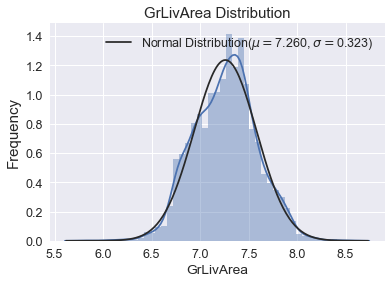


mu(Mean): 7.26
sigma(Standard Deviation): 0.323



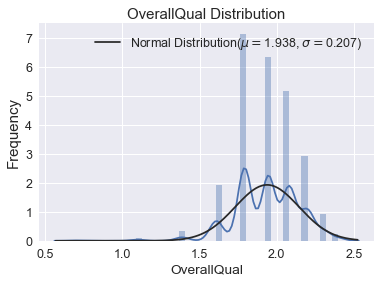


mu(Mean): 1.938
sigma(Standard Deviation): 0.207


In [74]:
import scipy.stats as scst
#For GrLivArea
print()
(mu, sigma) = scst.norm.fit(all_data['GrLivArea'])
mu = round(mu,3)
sigma = round(sigma,3)


plt.figure(3)
sns.distplot(all_data['GrLivArea'] , fit=scst.norm)
plt.title('GrLivArea Distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)],
loc='best')
plt.show()
print('\nmu(Mean):', mu)
print('sigma(Standard Deviation):', sigma)


#For OverallQual
print()
(mu, sigma) = scst.norm.fit(all_data['OverallQual'])
mu = round(mu,3)
sigma = round(sigma,3)


plt.figure(3)
sns.distplot(all_data['OverallQual'] , fit=scst.norm)
plt.title('OverallQual Distribution', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(['Normal Distribution($\mu=$%.3f, $\sigma=$%.3f)' % (mu,sigma)],
loc='best')
plt.show()
print('\nmu(Mean):', mu)
print('sigma(Standard Deviation):', sigma)


Skewness: 1.894512
Kurtosis: 6.568230


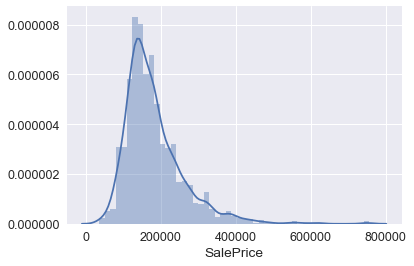

In [28]:
# I used the numpy fuction log1p which  applies log(1+x) to all elements of the column
# data_train["SalePrice"] = np.log1p(data_train["SalePrice"])


#histogram
sns.distplot(data_train['SalePrice']);

#skewness and kurtosis
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())


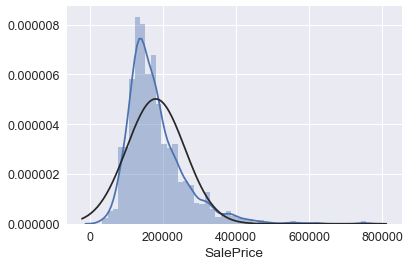

In [29]:

#histogram and normal probability plot
sns.distplot(data_train['SalePrice'], fit=norm);


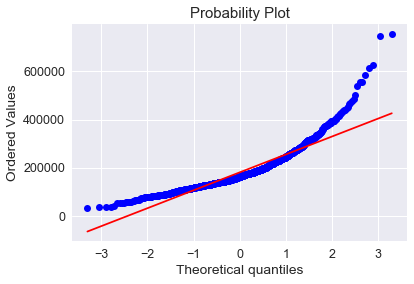

In [30]:

fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)


## Applying log transformation

using log1p or just log? which one is better?

[Read more from here](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.log1p.html)


In [31]:
data_train['SalePrice'] = np.log(data_train['SalePrice'])

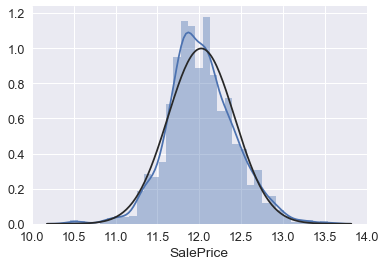

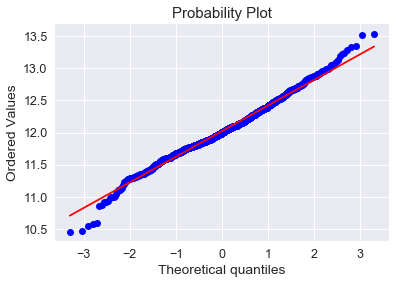

In [32]:

#transformed histogram and normal probability plot
sns.distplot(data_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)


In [33]:

y_train = data_train.SalePrice.values
y_train

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

<h6>Survey</h6>
As we can see from the plot values, our data is now in a much more uniform distribution.

# Categorical to Numerical 

As we have seen in our dataframe there are not only numerical but also there are some categorical data too. I am going to use get_dummies fuction to convert the categorical variable into numerical variable 

In [62]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html#pandas-get-dummies
all_data = pd.get_dummies(all_data)
all_data.shape


(2907, 271)

## Split train and test

In [63]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [64]:
print(test.shape)
test.head()

(1459, 271)


,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1448,3.044522,4.394449,9.360741,1.609438,1.386294,1.791759,1.945910,7.581720,7.581720,0.000000,...,0,0,0,1,0,0,0,0,1,0
1449,3.044522,4.406719,9.565775,1.386294,1.386294,1.945910,1.945910,7.580189,7.580189,4.691348,...,0,0,0,1,0,0,0,0,1,0
1450,4.110874,4.317488,9.534668,1.386294,1.386294,1.791759,1.791759,7.599902,7.600402,0.000000,...,0,0,0,1,0,0,0,0,1,0
1451,4.110874,4.369448,9.208238,1.386294,1.386294,1.945910,1.945910,7.600402,7.600402,3.044522,...,0,0,0,1,0,0,0,0,1,0
1452,4.795791,3.784190,8.518392,1.386294,1.386294,2.197225,1.791759,7.597396,7.597396,0.000000,...,0,0,0,1,0,0,0,0,1,0


In [65]:

# saving to csv to use later in different algorithms
data = pd.concat([train, pd.DataFrame(y_train, columns=['SalePrice'])], axis=1)
data.to_csv('train_salePrice.csv',index=False)
test.to_csv('test_salePrice.csv', index=False)


In [66]:
test_ID.shape
# test_ID.head(5)
ids = pd.DataFrame(test_ID, columns=['Id'])
ids.to_csv('test_id.csv', index=False)

In [67]:
y_train.shape

(1448,)

# Copying Available Datasets

keeping copy of Datasets that was created earlier to reuse it later on .

In [68]:
train_1 =train.copy()
test_1 =test.copy()
df_train = data_train.copy()
df_test = data_test.copy()
print ("Data copy complete")

Data copy complete


In [81]:
y_train.shape

(1448,)

In [82]:
print("Train Set Shape : ",train.shape)
print("Test Set Shape :",test.shape)

Train Set Shape :  (1448, 375)
Test Set Shape : (1459, 375)


And now we have equal number of features which is exactly what we desire. As we have taken care of the normalization, we shall now scale down the target variable SalePrice. We take the log here because the error metric is between the log of the SalePrice and the log of the predicted price. That does mean we need to exp() the prediction to get an actual sale price.

In [144]:
#label_df is the dataframe made solely with the target field SalePrice
label_df = pd.DataFrame(index = train.index, columns=["SalePrice"])
label_df["SalePrice"] = np.log(data_train["SalePrice"])

print("label_df", label_df.shape)


label_df (1448, 1)


--------------
In order to check the accuracy of various models later on I've defined here a function to calculate the root mean squared error(RMSE) which shall later help to evaluate models

In [84]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

<h2>Detect and weed out further outliers through IsolationForest</h2>

The IsolationForest is an ensemble algorithm which is used to determine anomalies/outliers. From Scikit-Learn's documentation, which describes it well - 

<i>The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.</i>

In [209]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=500, max_samples=1.0, random_state=1001, bootstrap=True, contamination=0.02, verbose=0, n_jobs=-1)
print('\nRunning Isolation Forest:')
clf.fit(train, label_df)
isof = clf.predict(train)
label_df['isof'] = isof
train['isof'] = isof
#myindex = train['isof'] < 0
train.drop(train[train["isof"] <0].index, inplace=True)
label_df.drop(label_df[label_df["isof"] <0].index, inplace=True)
train = train.drop('isof', axis=1)
label_df = label_df.drop('isof', axis=1)
print("Train set shape: ", train.shape)
print("Target Shape", label_df.shape)


Running Isolation Forest:
Train set shape:  (1419, 375)
Target Shape (1419, 1)


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



In [69]:

# import the dataset
train = pd.read_csv('./train_salePrice.csv')
test = pd.read_csv('./test_salePrice.csv')

# # target feature
# y_tr = pd.DataFrame()
# y_tr['SalePrice'] = train.SalePrice

In [70]:
train.shape

(1448, 272)

In [71]:

numeric_feats = list(numeric_feats)
print(numeric_feats)
# print(len(numeric_feats))
# all the numeric features without dummy features.


['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'OverallQual_2', 'OverallQual_3', 'OverallQual_sq', 'GrLivArea_2', 'GrLivArea_3', 'GrLivArea_sq', 'GarageCars_2', 'GarageCars_3', 'GarageCars_sq', 'ExterQual_2', 'ExterQual_3', 'ExterQual_sq', 'GarageArea_2', 'GarageArea_3', 'GarageArea_sq'

In [72]:
len(numeric_feats)

100

In [77]:

# target feature
y_tr = pd.DataFrame()
y_tr['SalePrice'] = train.SalePrice
y_tr.shape

(1448, 1)

In [78]:

train.drop("SalePrice", axis = 1, inplace = True)


In [79]:
train.shape

(1448, 271)

## Modelling and Predictions

For modeliing and prediction analysis analysis I have used 3 different algorithms:

    1.XGBoost
    2.Lasso Regression 
    3.Linear Regression 


## 1. XGBoost

XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.

This means we can use the full scikit-learn library with XGBoost models.

The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.

[Learn more from here](https://xgboost.readthedocs.io/en/latest/index.html)

In [114]:

model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)

model_xgb.fit(train, label_df) #fitting the model 

#make Prediction

y_pred = model_xgb.predict(train)
y_test = label_df
print("XgBoost score on training set: ", rmse(y_test, y_pred)) 

XgBoost score on training set:  0.007228968106147068


#### Predict the result 

In [212]:
y_pred_xgb = model_xgb.predict(test)
y_pred_xgb

array([0.90080935, 0.9095861 , 0.9153086 , ..., 0.91074085, 0.8963932 ,
       0.9181987 ], dtype=float32)

## Exporting Data to csv


In [213]:
#get the XGB only result
y_xgb_only=np.exp(y_pred_xgb)
pred_df = pd.DataFrame(y_xgb_only,index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('LASSOoutput.csv', header=True, index_label='Id')

## 2. LASSO Regression 

Lasso regression is a simple techniques way to reduce model complexity and prevent over-fitting which may result from simple linear regression.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)


[learn More here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

##### Modelling

In [100]:
best_alpha = 0.00099 #a bit arbitrary and based on some trial and error process
print("Lasso regressor is running...")
regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train, label_df)
 
y_pred = regr.predict(train)#fitting the model 
y_test = label_df

accuracy_score = rmse(y_test, y_pred)
print("Lasso score on training set: ", accuracy_score*100)


Lasso regressor is running...
Lasso score on training set:  0.5451509075296066


#### Predict the result 

In [113]:
y_pred_lasso = regr.predict(test)
y_pred_lasso

array([0.90013948, 0.91105758, 0.91431241, ..., 0.90931289, 0.89626047,
       0.92361421])

## Exporting Data to csv


In [211]:
#get the LASSO only result
y_lasso_only=np.exp(y_pred_lasso)
pred_df = pd.DataFrame(y_lasso_only, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('LASSOoutput.csv', header=True, index_label='Id')

## 3. Linear Regression

 linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).
Linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.

[Learn more from here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y_test = train_test_split(
                                    data_train,y_train , random_state=42, test_size=.33)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(train, label_df)

y_pred = model.predict(train)
y_test = label_df
print("Linear score on training set: ", rmse(y_test, y_pred))


Linear score on training set:  0.0028934252678305523


#### Predict the result 

In [216]:
y_pred_lnr = lr.predict(test)
y_pred_lasso

array([[0.89971989],
       [0.90803969],
       [0.91487283],
       ...,
       [0.91165018],
       [0.89928341],
       [0.91816133]])

## Exporting Data to csv


In [217]:
y_linear_only=np.exp(y_pred_lnr)
pred_df = pd.DataFrame(y_linear_only, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('Linearoutput.csv', header=True, index_label='Id')

# Survey

The results of the Algorithms on their accuracy on the training sets are as follows 


|Algorithms                 |      RMSE          |
|---------------------------|--------------------|
|XGBOOST                    |      0.7228        |
|Lasso                      |      0.5451        |
|Linear                     |      0.2893        |


# ANN with Tensorflow

**About TensorFlow**

TensorFlow™ is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.


**Hyperparameters related to Network structure**

Hyperparameters are the variables which determines the network structure(Eg: Number of Hidden Units) and the variables which determine how the network is trained(Eg: Learning Rate).

Hyperparameters are set before training(before optimizing the weights and bias).

There are some couple of hypermetes to be tuned in NN . namely- ***number of hidden layer***, ***Dropout***, ***Activation function***, ***Learning rate***, ***number of epoches***, ***cross validation*** etc. 

# Making a simple NN or no hidden layer Model

This is the simplest NN model. In between Input to output there's no extra hidden layer.

In [74]:
## import Tensorflow
import tensorflow as tf

In [83]:

# specify the number of input and output
n_inputs = train.shape[1]
n_outputs = 1
print(n_inputs)


271


In [84]:
y_tr.shape

(1448, 1)

### Placeholder

The function creates the placeholders for the tensorflow session.The param input_size is scalar, input size. parameter output_size is scalar, output size.

**Strategy** here-

This model will try to minimize the loss of predicted values of y by tuning weights and biases. Adam Optimizer will tweak the model parameters to minimize the cost function.

We will train this model for EPOCH times and then predict the validation sets SellPrice.

**Choosing EPOCH**: We will let the model learn until it starts over fitting. So checking the validation loss and training loss we will select the EPOCH values.

This model has not much complexities in its architecture so it will operate like a linear regression model.

In [85]:
y_train.shape

(965, 1)

In [86]:

# placeholder nodes to represent the training data and target
X = tf.placeholder(name="X", dtype=tf.float32, shape=[None, n_inputs])
y_true = tf.placeholder(dtype=tf.float32, shape=[None, n_outputs], name = "y")
print(X)
print(y_true)


# weights and biases
W = tf.Variable(tf.truncated_normal([n_inputs, n_outputs], stddev=(2/np.sqrt(n_inputs))), name='W')
b = tf.Variable(tf.zeros([n_outputs]), name='b')


print(W)
print(b)


# Hypothesis 
y_pred = tf.add(tf.matmul(X, W), b, name='output')
print(y_pred)


# Mean Squared Error Cost Function 
# loss = tf.losses.mean_squared_error(labels=y_true, predictions=y_pred)
loss = tf.reduce_mean(tf.square(y_pred - y_true), name='loss')


# hyperparameters of the model 
learning_rate = 0.005
EPOCH = 2500


# Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op = optimizer.minimize(loss)



Tensor("X_1:0", shape=(?, 271), dtype=float32)
Tensor("y_1:0", shape=(?, 1), dtype=float32)
<tf.Variable 'W_1:0' shape=(271, 1) dtype=float32_ref>
<tf.Variable 'b_1:0' shape=(1,) dtype=float32_ref>
Tensor("output_1:0", shape=(?, 1), dtype=float32)


# K-fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. 

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

The model parametes will be decided later on


In [97]:
type(y_train)

numpy.ndarray

In [87]:

Single_layer_NN_validation_score = []

# 3 fold cross_validation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
k = 3
kf = KFold(n_splits=k, shuffle=True)

for train_index, test_index in kf.split(train):
    
    # Partition the dataset in train + validation sets
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test_nn = y_tr.iloc[train_index], y_tr.iloc[test_index]
    print('------New validation set created--------')
    
    # scale the data
    stdSc = StandardScaler()
    X_train.loc[:, numeric_feats] = stdSc.fit_transform(X_train.loc[:, numeric_feats])
    X_test.loc[:, numeric_feats] = stdSc.transform(X_test.loc[:, numeric_feats])
    print('scaling complete!!')
    
    
    # ==========================================model============================================
    
    
    train_loss = np.zeros(EPOCH)
    validation_loss = np.zeros(EPOCH)


    # Global Variables Initializer
    init = tf.global_variables_initializer()

    # Starting the Tensorflow Session 
    with tf.Session() as sess:
        
        # Initializing the Variables 
        sess.run(init)

        # Iterating through all the epochs 
        for epoch in range(EPOCH):

            # Feeding data into the optimizer using Feed Dictionary 
            _, loss_value = sess.run((train_op, loss), {X:X_train, y_true:y_train.values.tolist()})
            
            # keeping track of the loss values on train and validation set
            validation_loss[epoch] = mean_squared_error(sess.run(y_pred, {X:X_test}), y_test_nn)
            train_loss[epoch] = loss_value
            
            # Displaying the loss after every 500 epochs 
            if(epoch%500==0):
                    print("epoch", str(epoch), 'Training loss ==', round(loss_value, 5), end='\t')
                    print('Validation loss ==', round(validation_loss[epoch], 5))

        print("epoch", str(epoch+1), 'Training loss ==', round(loss_value, 5), end='\t')
        print('Validation loss ==', round(validation_loss[epoch], 5))

        # validation set prediction
        y_pred_NN = sess.run(y_pred, {X:X_test})
        
        # check the rmse of validation set
        Single_layer_NN_validation_score.append(mean_squared_error(y_pred_NN, y_test_nn))
        # print(Single_layer_NN_validation_score)



print('validation loss average: ', sum(Single_layer_NN_validation_score) / len(Single_layer_NN_validation_score))



------New validation set created--------
scaling complete!!
epoch 0 Training loss == 164.2193	Validation loss == 162.27182
epoch 500 Training loss == 0.03555	Validation loss == 0.05466
epoch 1000 Training loss == 0.01541	Validation loss == 0.03175
epoch 1500 Training loss == 0.01057	Validation loss == 0.02497
epoch 2000 Training loss == 0.00921	Validation loss == 0.02263
epoch 2500 Training loss == 0.00871	Validation loss == 0.02205
------New validation set created--------
scaling complete!!
epoch 0 Training loss == 156.48773	Validation loss == 153.1215
epoch 500 Training loss == 0.04514	Validation loss == 0.0662
epoch 1000 Training loss == 0.01758	Validation loss == 0.02986
epoch 1500 Training loss == 0.0114	Validation loss == 0.02215
epoch 2000 Training loss == 0.00972	Validation loss == 0.01998
epoch 2500 Training loss == 0.00911	Validation loss == 0.01905
------New validation set created--------
scaling complete!!
epoch 0 Training loss == 158.35443	Validation loss == 153.2932
epoch

In [88]:
print('validation loss average: ', sum(Single_layer_NN_validation_score) / len(Single_layer_NN_validation_score))

validation loss average:  0.020779885524819245


# Prediction on test data 

In [89]:

X_test_real = test.copy()
X_train_full = train.copy()

stdSc = StandardScaler()
X_train_full.loc[:, numeric_feats] = stdSc.fit_transform(X_train_full.loc[:, numeric_feats])
X_test_real.loc[:, numeric_feats] = stdSc.transform(X_test_real.loc[:, numeric_feats])
print('scaling complete!!')



scaling complete!!


In [90]:

#  hyperparameters of the model 
learning_rate = 0.001
EPOCH = 2000

train_loss = np.zeros(EPOCH)


# Global Variables Initializer
init = tf.global_variables_initializer()

saver = tf.train.Saver()

# Starting the Tensorflow Session 
with tf.Session() as sess:
    # Initializing the Variables 
    sess.run(init)

    # Iterating through all the epochs 
    for epoch in range(EPOCH):
        
        # Feeding data into the optimizer using Feed Dictionary 
        _, loss_value = sess.run((train_op, loss), {X:X_train_full, y_true:y_tr.values.tolist()})

        
        train_loss[epoch] = loss_value
        # Displaying the loss after every 500 epochs 
        if(epoch%500==0):
                print("epoch", str(epoch), 'Training loss ==', (loss_value))

    print("epoch", str(epoch+1), 'Training loss ==', (loss_value))

    # save the model
    path = './my_NN_model_'  + '.ckpt'
    save_path = saver.save(sess, path)
    print("Model saved in path: %s" % save_path)
    
    y_nn = sess.run(y_pred, {X:X_test_real.values.tolist()})
    


epoch 0 Training loss == 144.8448
epoch 500 Training loss == 0.034406226
epoch 1000 Training loss == 0.016569184
epoch 1500 Training loss == 0.011363177
epoch 2000 Training loss == 0.009874001
Model saved in path: ./my_NN_model_.ckpt


In [91]:

saver = tf.train.Saver()
# load the saved model to predict test set
with tf.Session() as sess:
    path = './my_NN_model_' + '.ckpt'
    saver.restore(sess, path)
    y_nn = sess.run(y_pred, {X:X_test_real.values.tolist()})



INFO:tensorflow:Restoring parameters from ./my_NN_model_.ckpt


In [92]:

# reverse the log transformed SalePrice
y_nn = np.exp(y_nn)
y_nn = y_nn.round()

# save the result to csv 
sub = pd.read_csv('./test_id.csv')
sub['SalePrice'] = y_nn


path = 'ANN_SUBMISSION_09'  + '.csv'
sub.to_csv(path, index=False)

print('predictions saved as: ', path)


predictions saved as:  ANN_SUBMISSION_09.csv


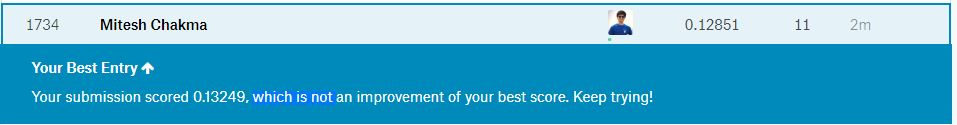

In [93]:
from IPython.display import Image
Image('./ANN_submission__09.JPG')


# Making the DNN Model

I am going to divide the task into three phase-

- The first step is the construction phase, building the TensorFlow graph.

- The second step is the execution phase, where we actually run the graph to train the model.

- After that we can use the trained model to make prediction.

### Number of Neurons

The number of neurons in the input and output layers is determined by the type of input and output our task requires. So we can only tune the hidden layers neurons. A common practice is to size them to form a funnel, with fewer and fewer neurons at each layer.

With the help of cross-validation different combinations of neurons for both hidden layers are tested and got better results on validation set on average with 1 and 1 neurons for first and second hidden layer.


[Read More from here](https://www.oreilly.com/library/view/neural-networks-and/9781492037354/ch01.html) & [Here](https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e)

In [95]:

# number of inputs, hidden neurons and outputs
n_inputs = train.shape[1]
n_hidden1 = 1
n_hidden2 = 1 
n_outputs = 1


# Placeholder

In [96]:

# placeholder nodes to represent the training data and target
X = tf.placeholder(tf.float32, shape=[None, n_inputs], name='X')
y = tf.placeholder(tf.float32, shape=[None, 1], name='y') #The shape of y is (None, 1) because we have only one output.


There are a lot of different activation functions to choose from to use in this model. Some of them are sigmoid, Relu, leaky relu, exponential linear unit(Elu).

- Sigmoid activation functions saturates for positive values so it is not wise to use it in DNN models.
- Relu performs well in these DNN models but it suffers from dying relu problem.
- There are other alternatives like leaky relu and exponential linear unit (ELU). These are known to perform well but these makes the models slow.

With cross-validation all the activation functions(relu, leaky-relu and elu) are compared and leaky-relu worked better of this model.

Relu has it's disadvantages as it sometimes fails because of dying relu problem. Elu function works well but it's slow. So I choose leaky-relu as activation function because it's fast at converging all the time, gives better model accuracy from the other variants of relu.

Instead of writing variables and activation for each layer every time, we will make a function to handle these for a single layer.

In [97]:
# def neural_network_model(x,y):
#     #hidden layer 1
#     # Calculating for the first layer
#     layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
#     layer_1 = tf.nn.relu(layer_1)#activation function 'relu'
#     dropout=tf.nn.dropout(layer_1,y)
#     #hideen layer 2
#     # Calculating for the second layer
#     layer_2 = tf.add(tf.matmul(dropout, weights['h2']), biases['b2'])
#     layer_2 = tf.nn.relu(layer_2)#activation function 'relu'
#     #hideen layer 3
#     # Calculating for the 3rd layer
#     layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
#     layer_3 = tf.nn.relu(layer_3)#activation function 'relu'

#     # output layer
#     out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
#     return (out_layer)




# neuron_layer function will create one layer at a time
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name="biases")
        z = tf.matmul(X, W) + b
        if activation=="relu":
            return tf.nn.relu(z)
        elif activation=="elu":
            return tf.nn.elu(z)
        elif activation=="leaky_relu":
            return tf.nn.leaky_relu(z)
        else:
            return z
        

**Working Principle**

- The first hidden layer takes X as its input. 

- The second takes the output of the first hidden layer as its input. 

- And finally, the output layer takes the output of the second hidden layer as its input and returns the target values.


**Choice of number of hidden layers:**

For many problems, a single hidden layer will give reasonable results. Deep networks have a much higher parameter efficiency than shallow ones: they can model complex functions using exponentially fewer  neurons than shallow nets, making them much faster to train. 

I have taken both one, two and three hidden layers separately and checked model performance against each other. After that ended up using two hidden layers because of its accuracy. With one hidden layer this model performs almost similarly but two hidden layers of 1 neurons each gave better test accuracy. So for this reason I kept the second hidden layer. 



In [99]:

# define the layers 
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation="leaky_relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation="leaky_relu")
    logits = neuron_layer(hidden2, n_outputs, "outputs")


# define the cost function
with tf.name_scope("loss"):
    # loss_op = tf.sqrt(tf.reduce_mean(tf.square(logits - y)), name="loss")
    loss_op = tf.reduce_mean(tf.square(logits - y), name="loss")

Learning rate has been chosen arbitarily with the value 0.001,0.01,0.03,0.003 where 0.003 were performed better thats why I have chosen 0.003

In [100]:

learning_rate = 0.003

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss_op)
    

In [ ]:

# Global Variables Initializer 
init = tf.global_variables_initializer()

saver = tf.train.Saver()


In [108]:
import random


In [115]:

# 3 fold cross_validation
DNN_validation_score = []

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=random.randint(30,70))

for train_index, test_index in kf.split(train):
    
    # Partition the dataset in train + validation sets
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    y_train, y_test_DNN = y_tr.iloc[train_index], y_tr.iloc[test_index]
    print('------New validation set created--------')

    # scale data
    stdSc = StandardScaler()
    X_train.loc[:, numeric_feats] = stdSc.fit_transform(X_train.loc[:, numeric_feats])
    X_test.loc[:, numeric_feats] = stdSc.transform(X_test.loc[:, numeric_feats])
    print('scaling complete!!')
    
    # ==========================================model============================================
    
    n_epochs = 2000
    
    train_loss = np.zeros(n_epochs)
    validation_loss = np.zeros(n_epochs)
    
    # Global Variables Initializer 
    init = tf.global_variables_initializer()

    with tf.Session() as sess:

        # Initializing all the Variables 
        init.run()

        # train the model 
        for epoch in range(n_epochs):
            _, loss_value= sess.run((training_op,loss_op),feed_dict={X:X_train, y:y_train.values.tolist()})

            # keep track of the losses
            train_loss[epoch] = loss_value
            validation_loss[epoch] = mean_squared_error(sess.run(logits, {X:X_test}), y_test_DNN)
            if(epoch%100==0):
                print("epoch", str(epoch), 'Training loss ==', round(loss_value, 5), end='\t')
                print('Validation loss ==', round(validation_loss[epoch], 5))

        print("epoch", str(epoch+1), 'Training loss ==', round(loss_value, 5), end='\t')
        print('Validation loss ==', (round(validation_loss[epoch], 5)))

        
#         plt.figure(figsize=(20,15))
#         plt.plot(epoch,round(loss_value, 5),'b')
#         plt.show() 
        # validation set prediction
        y_pred_DNN = sess.run(logits, {X:X_test})
        
        
        # check the rmse of validation set
        DNN_validation_score.append(mean_squared_error(y_pred_DNN, y_test_DNN))
        # print(DNN_validation_score)


print('validation loss average: ', sum(DNN_validation_score) / len(DNN_validation_score))


------New validation set created--------
scaling complete!!
epoch 0 Training loss == 137.88971	Validation loss == 134.392
epoch 100 Training loss == 11.01372	Validation loss == 11.86711
epoch 200 Training loss == 2.24296	Validation loss == 2.28956
epoch 300 Training loss == 0.1229	Validation loss == 0.15866
epoch 400 Training loss == 0.05928	Validation loss == 0.08816
epoch 500 Training loss == 0.03762	Validation loss == 0.0629
epoch 600 Training loss == 0.02697	Validation loss == 0.05032
epoch 700 Training loss == 0.02071	Validation loss == 0.04301
epoch 800 Training loss == 0.01684	Validation loss == 0.03857
epoch 900 Training loss == 0.01441	Validation loss == 0.03585
epoch 1000 Training loss == 0.01284	Validation loss == 0.03416
epoch 1100 Training loss == 0.01181	Validation loss == 0.03309
epoch 1200 Training loss == 0.0111	Validation loss == 0.03241
epoch 1300 Training loss == 0.0106	Validation loss == 0.03195
epoch 1400 Training loss == 0.01022	Validation loss == 0.03163
epoch 1

A several number of iterations and tests have been done and then chosen final model parameters are:


|Specs                      |DNN Model|
|---------------------------|-----|
|Number of Hidden Layers    |    2|
|First Hidden Layer Neurons |    1|
|Second Hidden Layer Neurons|    1|
|Learning Rate              |0.003|
|Epoch                      | 1500|
|Validation loss average| 0.022|


After roughly 1500 iterations,the the improvement on loss is very thin for all the cross-validation sets and in one case validation loss increases a bit after 1600 epochs which gives the idea that the model is over-fitting the training set. So we will keep the epochs to 1500.

# Finalized DNN Model

copying and scaling the data 

In [116]:

X_test_real = test.copy()
X_train_full = train.copy()

# scale the data
stdSc = StandardScaler()
X_train_full.loc[:, numeric_feats] = stdSc.fit_transform(train.loc[:, numeric_feats])
X_test_real.loc[:, numeric_feats] = stdSc.transform(test.loc[:, numeric_feats])
print('scaling Done!!')


scaling Done!!


##### Running the model 

In [117]:

n_epochs = 1500
train_loss = np.zeros(n_epochs)


# Global Variables Initializer
init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    
    # Initializing all the Variables 
    init.run()
    
    # train the model 
    for epoch in range(n_epochs):
        _, loss_value= sess.run((training_op,loss_op),feed_dict={X:X_train_full, y:y_tr.values.tolist()})
        
        train_loss[epoch] = loss_value
        if(epoch%100==0):
            print("epoch", str(epoch), 'loss ==', round(loss_value, 5))
    
    print("epoch", str(epoch+1), 'loss ==', round(loss_value, 5))
    
    
    
    # save the model
    path = './my_DNN_model.ckpt'
    save_path = saver.save(sess, path)
    print("Model saved in path: %s" % save_path)
    
    y_dnn = sess.run(logits, {X:X_test_real.values.tolist()})
    

epoch 0 loss == 149.44157
epoch 100 loss == 51.70268
epoch 200 loss == 0.63587
epoch 300 loss == 0.0613
epoch 400 loss == 0.05103
epoch 500 loss == 0.04226
epoch 600 loss == 0.03506
epoch 700 loss == 0.02932
epoch 800 loss == 0.02484
epoch 900 loss == 0.02138
epoch 1000 loss == 0.01871
epoch 1100 loss == 0.01665
epoch 1200 loss == 0.01506
epoch 1300 loss == 0.01382
epoch 1400 loss == 0.01286
epoch 1500 loss == 0.01212
epoch 1600 loss == 0.01154
Model saved in path: ./my_DNN_model.ckpt


In [118]:

# load the saved model to predict validation set 
with tf.Session() as sess:
    path = './my_DNN_model.ckpt'
    saver.restore(sess, path)
    
    # predict..
    y_dnn = sess.run(logits, {X:X_test_real})

    # reverse the log transformed SalePrice 
y_dnn = np.exp(y_dnn)
y_dnn = y_dnn.round()
# check the price 
# print(y_dnn[0:10])


# save the result to csv 
sub = pd.read_csv('./test_id.csv')
sub['SalePrice'] = y_dnn
path = 'ANN_Submission_17' + '.csv'
sub.to_csv(path, index=False)
print('predictions saved as: ', path)


INFO:tensorflow:Restoring parameters from ./my_DNN_model.ckpt
predictions saved as:  ANN_Submission_17.csv


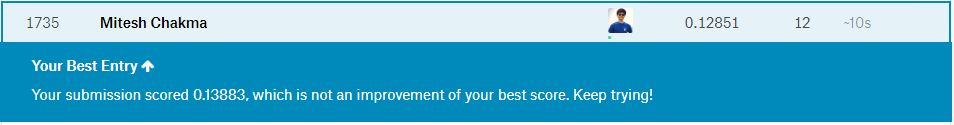

In [120]:
from IPython.display import Image
Image('./ANN_Submission_17.JPG')


# Tensorflow with Dropout

**Importing TensorFlow**

Importing tensorflow and converting the dataframe into array as tensorflow requires -

In [123]:
y_tr.shape

(1448, 1)

In [124]:
import tensorflow as tf
x_train = train.values
x_train
y_train_munged = test.values
y_train_munged.shape
y_train=y_tr.values
print(y_train.shape)

(1448, 1)


Here I have converted the values into “nparry” as it was suggested in the documentation and
it is faster in calculations

In [126]:
y_train=np.reshape(np.array(y_train),(1448,1))#1448x1 being the dimension
input_dim = x_train.shape[1]
print(input_dim)
output_dim = 1

271


In [127]:
nood_Hl_1 = 201 #layer 1
nood_Hl_2 = 100 #layer 2
nood_Hl_3 = 50 #layer 3

### Placeholder

The function creates the placeholders for the tensorflow session.The param input_size is scalar, input size. parameter output_size is scalar, output size.

In [128]:
#tf.placeholder is used to feed actual training examples

# placeholder nodes to represent the training data and target
X = tf.placeholder(tf.float32, shape=[None, input_dim], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')


In above code we initialize placeholders for labels and features placeholders are used so that data can be fed at a later time(during training,testing,prediction) and value is set to None because any number of samples can be used as input .

##### Weights and biases

We initialize weights biases for hidden layers

In [129]:
weights = {
    'h1': tf.Variable(tf.contrib.layers.xavier_initializer()((input_dim, nood_Hl_1))),
    'h2': tf.Variable(tf.contrib.layers.xavier_initializer()((nood_Hl_1, nood_Hl_2))),
    'h3': tf.Variable(tf.contrib.layers.xavier_initializer()((nood_Hl_2, nood_Hl_3))),
    'out': tf.Variable(tf.contrib.layers.xavier_initializer()((nood_Hl_3, output_dim)))
}
biases = {
    'b1': tf.Variable(tf.contrib.layers.xavier_initializer()([nood_Hl_1])),
    'b2': tf.Variable(tf.contrib.layers.xavier_initializer()([nood_Hl_2])),
    'b3': tf.Variable(tf.contrib.layers.xavier_initializer()([nood_Hl_3])),
    'out': tf.Variable(tf.contrib.layers.xavier_initializer()([output_dim]))
}

We build the neural network model with each layer output being relu(W(transpose)*X +b) where relu is rectified linear unit which is used as an activation function.

The Neural Network model manually using (arbitrarily) 3 layers and using relu
as our activation layers, The reason for chosing ReLu as activation function as it is non linear
which means I can easily backpropagate the errors and have multiple layers of neurons being
activated by the ReLU function.

In [130]:
def neural_network_model(x,y):
    #hidden layer 1
    # Calculating for the first layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)#activation function 'relu'
    dropout=tf.nn.dropout(layer_1,y)
    #hideen layer 2
    # Calculating for the second layer
    layer_2 = tf.add(tf.matmul(dropout, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)#activation function 'relu'
    #hideen layer 3
    # Calculating for the 3rd layer
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)#activation function 'relu'

    # output layer
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return (out_layer)

Y_hat is the predicted output value .We define loss function as MSE and use Adam optimizer and go through data 2000 times you can always play around with the learning rate, activation functions and use different types of optimizer’s.

**Dropout**

The term “dropout” refers to dropping out units (both hidden and visible) in a neural network. Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. 

More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed.

In simple words, Dropout is used to prevent over-fitting

[Learn More from here](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

With the learning rate being 0.01, We are going to check the optimum dropout rate which we are going to use in our final model network. The optimizer here used in my caseis an Adagrad optimizer (by default)

dropout  0.1 epoch no 0 1114.7267
dropout  0.1 epoch no 200 0.0044543394
dropout  0.1 epoch no 400 0.0011766134
dropout  0.1 epoch no 600 0.0012321736
dropout  0.1 epoch no 800 0.00050966506
dropout  0.1 epoch no 1000 0.0013028505
dropout  0.1 epoch no 1200 0.00049410824
dropout  0.1 epoch no 1400 0.0005572911
dropout  0.1 epoch no 1600 0.0005215744
dropout  0.1 epoch no 1800 0.0006873683
dropout  0.2 epoch no 0 1169.5883
dropout  0.2 epoch no 200 0.0069019217
dropout  0.2 epoch no 400 0.0014933583
dropout  0.2 epoch no 600 0.00080635404
dropout  0.2 epoch no 800 0.0005502486
dropout  0.2 epoch no 1000 0.00066047825
dropout  0.2 epoch no 1200 0.0005621506
dropout  0.2 epoch no 1400 0.00050238793
dropout  0.2 epoch no 1600 0.00038006672
dropout  0.2 epoch no 1800 0.0003405274
dropout  0.3 epoch no 0 963.9143
dropout  0.3 epoch no 200 0.009833628
dropout  0.3 epoch no 400 0.0011495552
dropout  0.3 epoch no 600 0.00088906096
dropout  0.3 epoch no 800 0.00062763604
dropout  0.3 epoch no 10

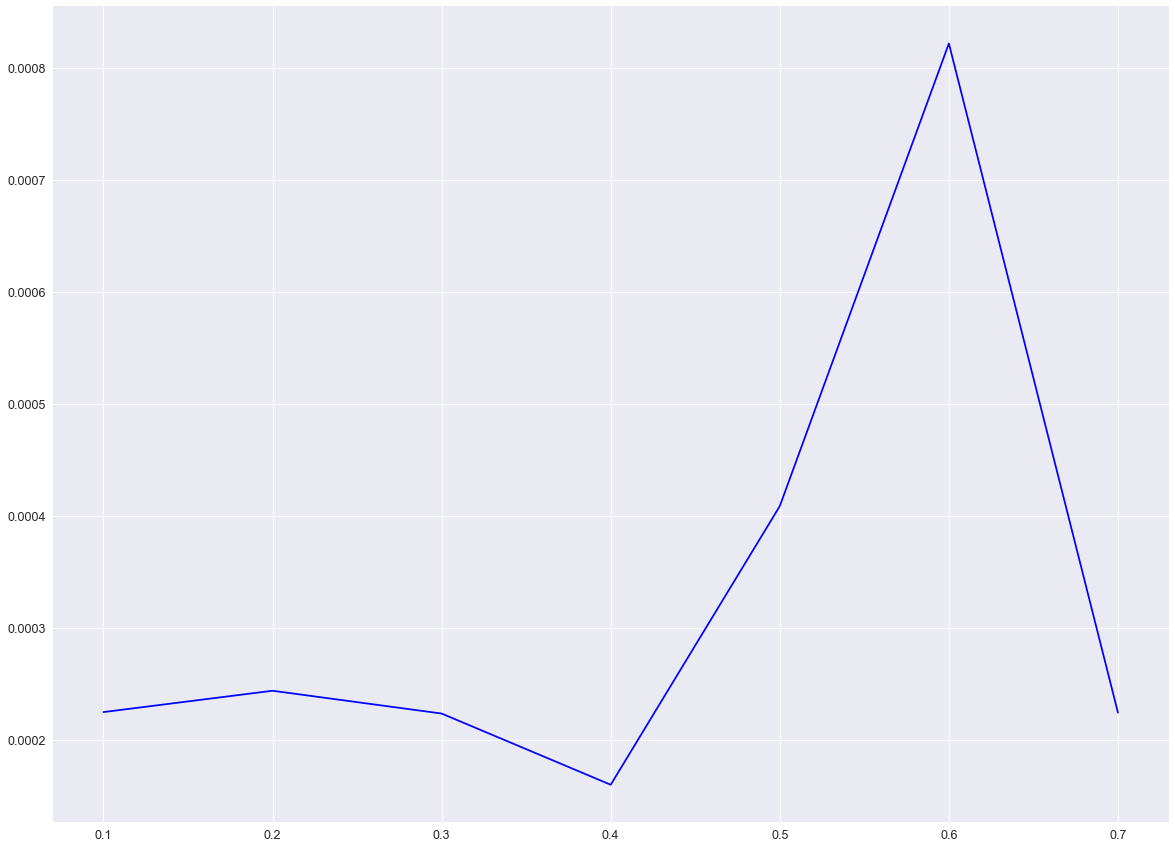

In [230]:

DropOuts = [float(i/10) for i in range(1,8)]
#mse=[i for i in range(19,4,-2)]

mseList=[]
for dropout in DropOuts:
    minMSE=1000000
    Y_hat=neural_network_model(X,dropout)
    loss_op=tf.losses.mean_squared_error(Y,Y_hat)#the loss function
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
    train_op = optimizer.minimize(loss_op)#minimize losss
    init = tf.global_variables_initializer()
    epoch=2000
    with tf.Session() as sess:
        sess.run(init)
        for i in range(epoch):
            #feed_dict is used to feed data to placeholders and pred is the actual output on the test set .
            sess.run(train_op,feed_dict={X:x_train[0:1200],Y:y_train[0:1200]}) 
            
            
            loss=sess.run(loss_op,feed_dict={X:x_train[1200:],Y:y_train[1200:]})
            if(loss<minMSE):
                minMSE=loss
                
            if(i%200==0):
                print("dropout " ,dropout,"epoch no "+str(i),(loss))
            if(i==epoch-1):
                mseList.append(minMSE)
        

plt.figure(figsize=(20,15))
plt.plot(DropOuts,mseList,'b')
plt.show()    


Dropout is a regularisation technique for multilayered deep learning models. We can set
a value from 0 through 1.0. These are probability values. They represent the percentage of
neurons whose output will be dropped out from being passed to the next layer. This effectively reduces the number of parameters and simplifies the model that is being fit. One
easy thumb rule is: the noisier the dataset, higher the probability you need to set. 
    [Reference](http://jmlr.org/papers/v15/srivastava14a.html?fbclid=IwAR0uebqJevBpDitFymzjEBFPN6ijcX_rK4grCaaGm3
yVkyyrbnpvzMxabw)
    
As I got many outliers in my dataset, Dropout yeilds the best reseult with checking the learning curve.
As seen from above, 0.4 yeilded the best result and I will be using it for the model reference.

In [138]:
def neural_network(x):
    #hidden layer 1
    # Calculating for the first layer
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)#activation function 'relu'
    dropout=tf.nn.dropout(layer_1,0.5)
    #hideen layer 2
    # Calculating for the second layer
    layer_2 = tf.add(tf.matmul(dropout, weights['h2']), biases['b2']
    layer_2 = tf.nn.relu(layer_2)#activation function 'relu'
    #hideen layer 3
    # Calculating for the 3rd layer
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)#activation function 'relu'

    # output layer
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return (out_layer)

In [150]:
minMSE=1000000
Y_hat=neural_network(X)
loss_op=tf.losses.mean_squared_error(Y,Y_hat)#the loss function
optimizer = tf.train.AdamOptimizer(learning_rate=0.01) #Adam optimizer with learn
train_op = optimizer.minimize(loss_op)#minimize losss
init = tf.global_variables_initializer()
epoch=2000
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        sess.run(train_op,feed_dict={X:x_train,Y:y_train})
        loss=sess.run(loss_op,feed_dict={X:X_test,Y:y_test_DNN})
        if(loss<minMSE):
            minMSE=loss
        if(i%200==0):
            print("epoch no "+str(i),(loss))
    pred=sess.run(Y_hat,feed_dict={X:test})#test=test dataframe
    print(len(pred))

epoch no 0 64.61596
epoch no 200 85.97952
epoch no 400 57.80841
epoch no 600 57.47272
epoch no 800 59.5326
epoch no 1000 57.33893
epoch no 1200 59.629616
epoch no 1400 60.505074
epoch no 1600 60.780014
epoch no 1800 58.570415
1459


In [152]:
pred_mod=np.exp(pred)
pred_df = pd.DataFrame(pred_mod, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('TensorFlowANN_DP.csv', header=True, index_label='Id')

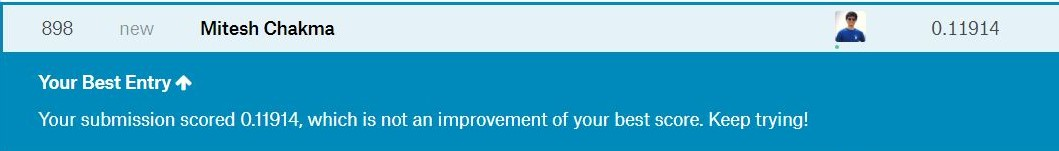

In [153]:
from IPython.display import Image
Image('./capture.JPG')


# Result



|Specs                      |Simple NN Model|DNN Model with CV| DNN with Dropout | 
|---------------------------|----|----|----|
|Number of Hidden Layers    |   0|   2|   3|
|First Hidden Layer Neurons |   0|   1| 201|  
|Second Hidden Layer Neurons|   0|   1| 100|
|Third Hidden Layer Neurons |  NA|  NA| 50 |
|Dropout                    |  No|  No| YES|
|Learning Rate              |0.001|0.003|0.01|
|Epoch                      |2000| 1500|2000|
|Kaggle Result              |0.13249| 0.13883|0.11914|














# Ensembled result 

In [ ]:

y_pred_lasso = regr.predict(test)
y_pred_lin=lr.predict(test)
y_pred_xgb=model_xgb.predict(test)

pred_df.to_csv('ANNoutput.csv', header=True, index_label='Id')
#get the LASSO only result
y_lasso_only=np.exp(y_pred_lasso)
pred_df = pd.DataFrame(y_lasso_only, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('LASSOoutput.csv', header=True, index_label='Id')
#get the Linear Reg only result
y_linear_only=np.exp(y_pred_lin)
pred_df = pd.DataFrame(y_linear_only, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('Linearoutput.csv', header=True, index_label='Id')
#get the Xgb only result
y_xgb_only=np.exp(y_pred_xgb)
pred_df = pd.DataFrame(y_xgb_only, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('XGBoutput.csv', header=True, index_label='Id')
#get the Ensembled learning result
y_pred = (y_pred_nn + 5*y_pred_lasso) / 6
y_pred = np.exp(y_pred)
pred_df = pd.DataFrame(y_pred, index=test_data["Id"], columns=["SalePrice"])
pred_df.to_csv('output.csv', header=True, index_label='Id')

# Discussion 

I tried to apply GridSearch which happens to be more time consuming considering the datasets and I think for this hyperparameter tuning is enough.

Manually updating the parameters takes too much time to yield the result.

The model can be more fine tuned by testing and implementing l2_regularization, forward_propagation technique and so on. However it will also increase the model complexity. 



# Further Improvements


With the help of keras , a lot of these fine tuning can be easily done which is less time consuming and easy to use.

# Conclusions 

For the tensoflow based ANN algorithm the best score
is 0.11914. However, there are many other methods that could be applied for a
better result. For further improvement of the result we need to pursue methods other than simply
scikit based ANN, and in a high-end machine. It has been studied that keras/tensorflow based
methods often yields better results, since this was done to get the best possible result
using Scikit learn based ANN only, keras based methods have not been applied. Thus a different
approach altogether than scikit learn based ANN or a better ensemble method with other regressor
algorithm might yield a far better result than thus far experienced here.

# References


These linked helped me lot while doing this assignment specially the article "Regression in Neural Networks using TensorFlow(Low Level APIs)" was a huge help when I started doing this


- [The APIs for neural networks in TensorFlow](https://www.oreilly.com/ideas/the-apis-for-neural-networks-in-tensorflow/)

- [TENSORFLOW: LOW LEVEL API WITH IRIS DATASETS](https://simply-python.com/2018/06/18/tensorflow-low-level-api-with-iris-datasets/)

- [Regression in Neural Networks using TensorFlow(Low Level APIs)](https://medium.com/@shantanusingh_71633/regression-in-neural-networks-using-tensorflow-low-level-apis-818b8bb7b433)

- [Dropout (neural network regularization)](https://www.commonlounge.com/discussion/694fd08c36994186a48d122e511f29d5/)



Data processing was a huge help for this karnels -

- [Stacked Regression](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/)
- [PREDICTING HOUSE PRICES ON KAGGLE: A GENTLE INTRODUCTION TO DATA SCIENCE – PART I](https://blog.akquinet.de/2017/09/19/predicting-house-prices-on-kaggle-part-i/)

# Updates in this Version --


1. Data preprocessing has been done more carefully this time as it was difficult to keep track in the earlier versions
2. DNN part has been done with new approach 
    - No layer DNN with Cross validation 
    - DNN with Cross validation 
    - DNN with Dropout
    

<h4><center>END of SCRIPT<h4>